In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [11]:
files = glob.glob("states*.csv")
df_list = []
for i in files:
  data = pd.read_csv(i)
  df_list.append(data)
us_census = pd.concat(df_list,ignore_index=True)

In [12]:
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74      

In [13]:
us_census["Income"] = us_census.Income.replace("[\$,]","",regex=True)
us_census["Income"] = pd.to_numeric(us_census.Income)
us_census["Men"] = us_census['GenderPop'].str.split('_').str[0]
us_census["Women"] = us_census['GenderPop'].str.split('_').str[1]
us_census["Men"] = us_census['Men'].replace("M","",regex=True)
us_census["Women"] = us_census['Men'].replace("F","",regex=True)
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop       Men     Women  
0   0.03%  43296.36    2341093M_2489527F   2341093   2341093  
1   1.06%  70354.74      384160M_349215F    384160    384160  
2   0.17%  54207.82    3299088M_3342840F   3299088   3299088  
3   0.15%  41935.63    1451913M_1506295F   1451913   1451913  
4   0.35%  67264.78  19087135M_19334329F  19087135  19087135  


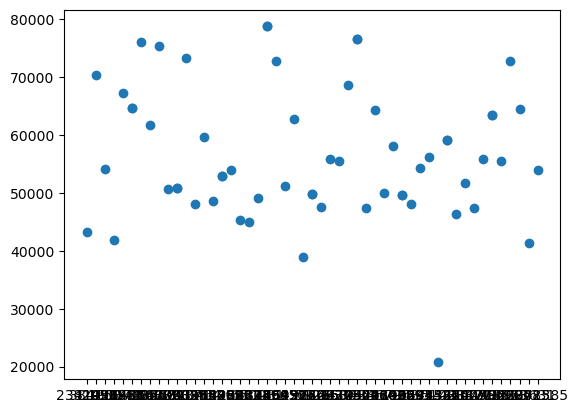

<Figure size 640x480 with 0 Axes>

In [14]:
plt.scatter(us_census.Women,us_census.Income)
plt.show()
plt.clf()

Number of NaN values in 'Women' column: 0
Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income        float64
GenderPop      object
Men            object
Women          object
dtype: object
0


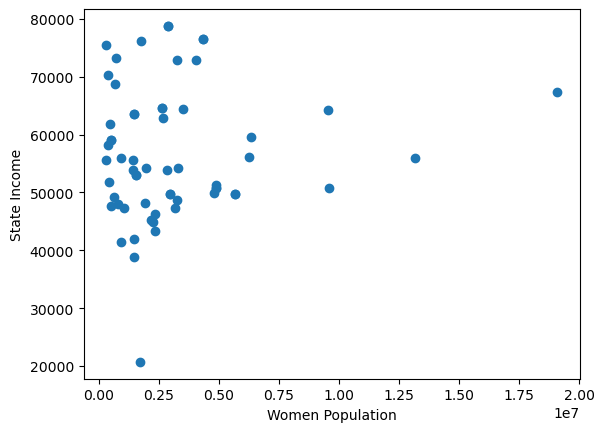

<Figure size 640x480 with 0 Axes>

In [15]:
print("Number of NaN values in 'Women' column:", us_census['Women'].isna().sum())
print(us_census.dtypes)
us_census["Men"] = pd.to_numeric(us_census.Men)
us_census["Women"] = pd.to_numeric(us_census.Women)
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])
print(us_census.duplicated().sum())
us_census = us_census.drop_duplicates()
plt.scatter(us_census.Women,us_census.Income)
plt.xlabel("Women Population")
plt.ylabel("State Income")
plt.show()
plt.clf()

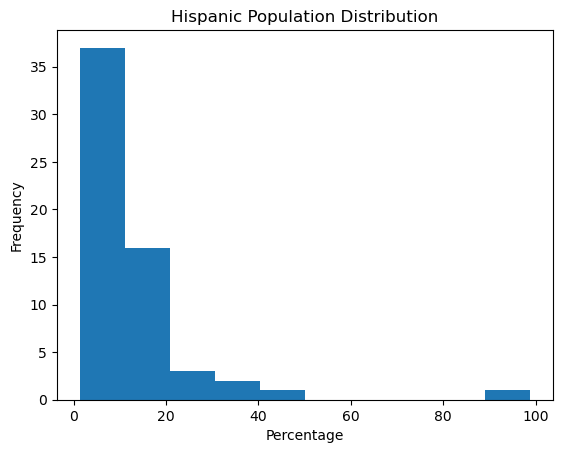

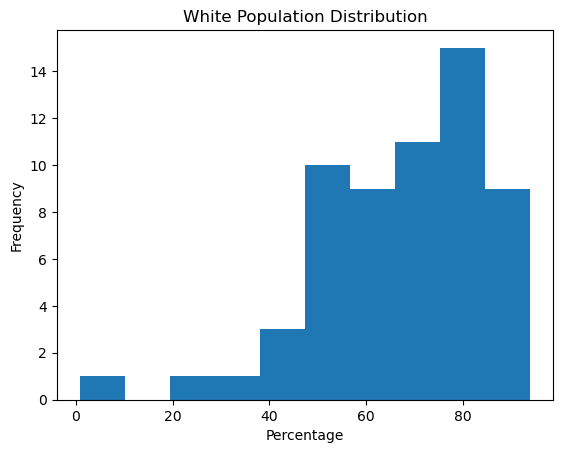

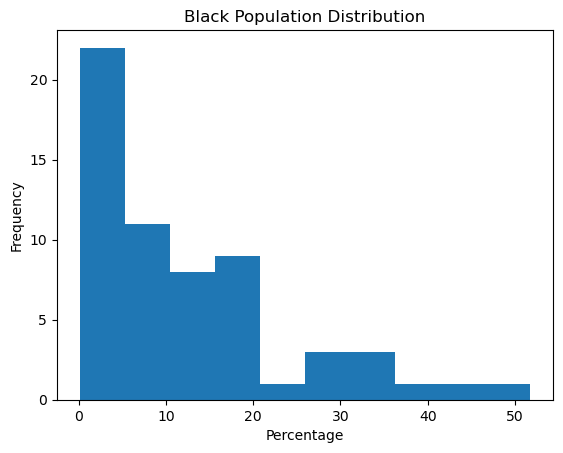

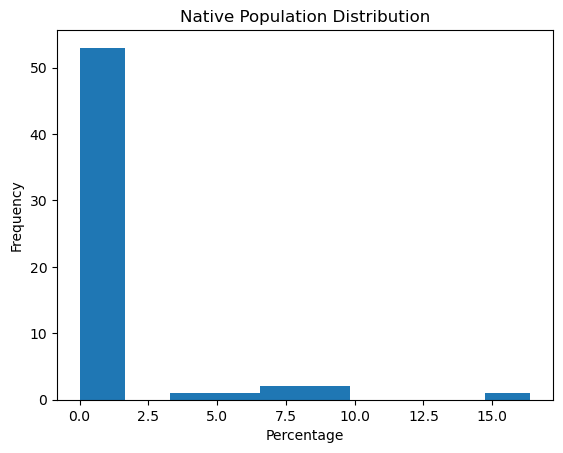

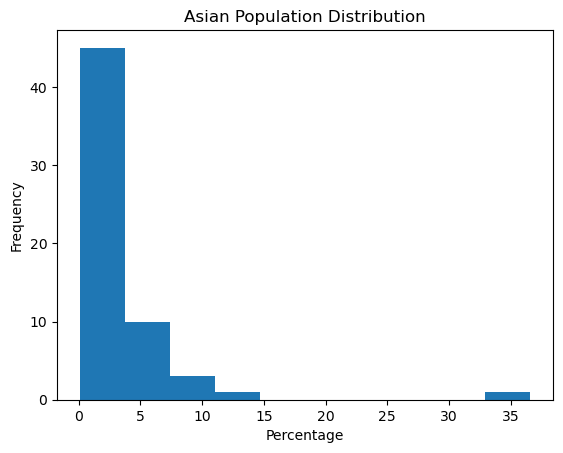

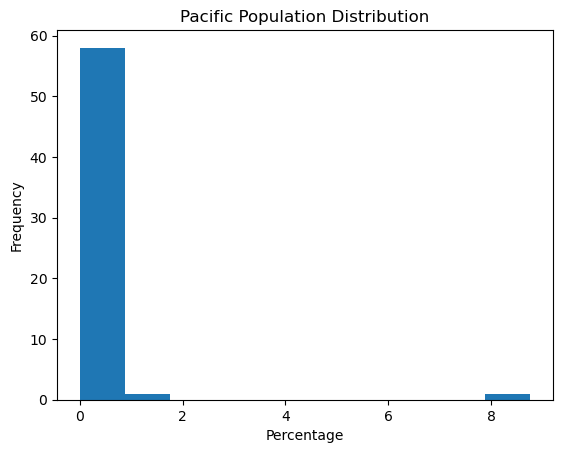

<Figure size 640x480 with 0 Axes>

In [16]:
race_columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
us_census[race_columns] = us_census[race_columns].replace('[\%,]', '', regex=True).astype(float)

# Fill NaN values with appropriate values (you can use mean, median, etc.)
us_census[race_columns] = us_census[race_columns].fillna(us_census[race_columns].mean())
us_census = us_census.drop_duplicates()
for j in race_columns:
  plt.hist(us_census[j])
  plt.title(j+' Population Distribution')
  plt.xlabel('Percentage')
  plt.ylabel('Frequency')
  plt.show()
  plt.clf()